<a href="https://colab.research.google.com/github/Champioa00/LAB1/blob/master/AJC%20Week4%20asnyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anthonny Champion
Week 4 async
Time Series Model

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Champioa00/LAB1/master/trend.csv', parse_dates=['login_date'], index_col=['login_date'])

In [5]:
df.head()

,sales
login_date,
2014-01-01,120
2014-01-02,122
2014-01-03,132
2014-01-04,136
2014-01-05,145


In [18]:
ts=df['sales'].resample('D').sum()

In [19]:
ts.head()

login_date
2014-01-01    120
2014-01-02    122
2014-01-03    132
2014-01-04    136
2014-01-05    145
Freq: D, Name: sales, dtype: int64

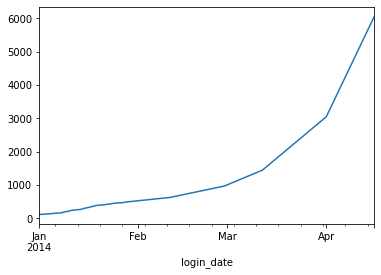

In [20]:
ts.plot()

In [21]:
import statsmodels.api as sm

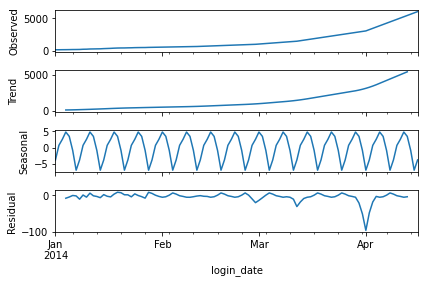

In [22]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adftest=adfuller(ts)

In [25]:
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  1.0


Step 4: Train test split

In [27]:
len(ts)

106

In [28]:
train=ts[:79]
test=ts[79:]

Build ARIMA MODEL 

Step 5 Hyperpararmeters of ARMIA model p d q

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import itertools

In [35]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [36]:
pdq_combinations=list(itertools.product(p,d,q))

In [37]:
len(pdq_combinations)

128

In [38]:
rmse=[]
order1=[]

In [50]:
for pdq in pdq_combinations:
  try:
    model=ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train),end=(len(ts)-1))
    error=np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  
  except:
    continue



In [51]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RSME'])

In [52]:
results.to_csv('ARIMA_results.CSV')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
model=ARIMA(train,order=(5,1,4)).fit()

In [40]:
pred=model.predict(start=len(train),end=(len(ts)-1))

Step8 Model Evaluation

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
error=np.sqrt(mean_squared_error(test,pred))
error

3779.1339601949217

In [43]:
test.mean(), np.sqrt(test.var())

(3743.3333333333335, 1238.1624101248406)

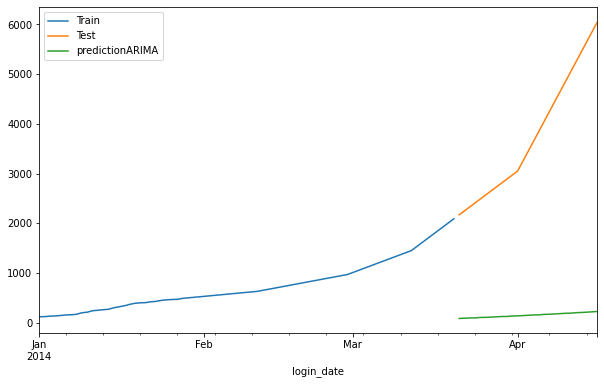

In [44]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='predictionARIMA')

Build the final Model

In [53]:
final_model=ARIMA(ts,order=(0,0,1)).fit()

In [54]:
prediction=final_model.predict(len(ts),len(ts)+1825)

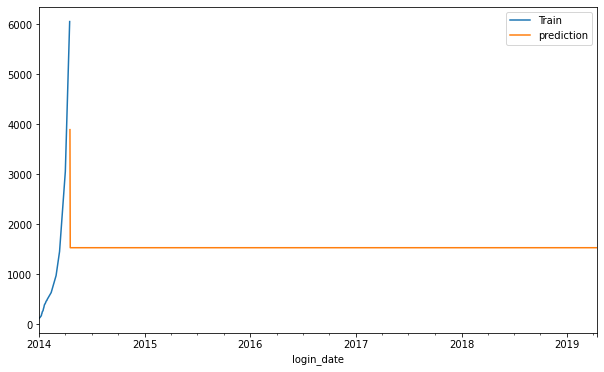

In [55]:
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')